In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [2]:
df_fpt= pd.read_csv('dataset/excel_fpt.csv')
columns = [i.replace('<', '').replace('>', '') for i in df_fpt.columns]
columns[1] = 'DateTime'
df_fpt.rename(columns = {df_fpt.columns[i]: columns[i] for i in range(len(df_fpt.columns))}, inplace = True)
df_fpt['DateTime'] = pd.to_datetime(df_fpt['DateTime'], format='%Y%m%d', errors='ignore')
df_fpt = df_fpt.set_index('DateTime')
df_fpt = df_fpt.sort_index()
df_fpt.head()

,Ticker,Open,High,Low,Close,Volume
DateTime,,,,,,
2006-12-13,FPT,22.5807,22.5807,22.5807,22.5807,83530
2006-12-14,FPT,23.7097,23.7097,23.7097,23.7097,280710
2006-12-15,FPT,24.8952,24.8952,24.8952,24.8952,265300
2006-12-18,FPT,26.1371,26.1371,26.1371,26.1372,215790
2006-12-19,FPT,27.4356,27.4356,27.4356,27.4356,137520


In [110]:
df = df_fpt.copy()
df['Close_diff_1'] = df['Close']-df.shift()['Close']
df['Close_diff_3'] = df['Close']-df.shift(2)['Close']
df['Close_diff_4'] = df['Close']-df.shift(3)['Close']
df['Close_diff_5'] = df['Close']-df.shift(4)['Close']
df['Close_diff_6'] = df['Close']-df.shift(5)['Close']
df['Close_diff_7'] = df['Close']-df.shift(6)['Close']

df.head()

,Ticker,Open,High,Low,Close,Volume,Close_diff_1,Close_diff_3,Close_diff_4,Close_diff_5,Close_diff_6,Close_diff_7
DateTime,,,,,,,,,,,,
2006-12-13,FPT,22.5807,22.5807,22.5807,22.5807,83530,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-14,FPT,23.7097,23.7097,23.7097,23.7097,280710,1.1290,NaN,NaN,NaN,NaN,NaN
2006-12-15,FPT,24.8952,24.8952,24.8952,24.8952,265300,1.1855,2.3145,NaN,NaN,NaN,NaN
2006-12-18,FPT,26.1371,26.1371,26.1371,26.1372,215790,1.2420,2.4275,3.5565,NaN,NaN,NaN
2006-12-19,FPT,27.4356,27.4356,27.4356,27.4356,137520,1.2984,2.5404,3.7259,4.8549,NaN,NaN


In [112]:
df = df[['Close_diff_1','Close_diff_3','Close_diff_4','Close_diff_5','Close_diff_6','Close_diff_7']]
df = df.dropna()
y_train = df[['Close_diff_1']]['2007-01-01':'2017-01-01'].to_numpy()
y_test = df[['Close_diff_1']]['2017-01-01':].to_numpy()
x_train = df[['Close_diff_3','Close_diff_4','Close_diff_5','Close_diff_6','Close_diff_7']]['2007-01-01':'2017-01-01'].to_numpy()
x_test = df[['Close_diff_3','Close_diff_4','Close_diff_5','Close_diff_6','Close_diff_7']]['2017-01-01':].to_numpy()
# print(x_train)

print("Train: {}\t Test: {}".format(len(x_train), len(x_test)))
print("Shape:", x_train.shape, y_train.shape)

Train: 2488	 Test: 989
Shape: (2488, 5) (2488, 1)


In [113]:
# reshape input to be 3D [samples, timesteps, features]
train_X = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
test_X = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
print("Shape:", train_X.shape, y_train.shape)

Shape: (2488, 1, 5) (2488, 1)


In [114]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')


In [115]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 50)                11200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 11,251
Trainable params: 11,251
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1343
Epoch 2/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1346
Epoch 3/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1347
Epoch 4/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1344
Epoch 5/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1344
Epoch 6/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1343
Epoch 7/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1344
Epoch 8/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1345
Epoch 9/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1345
Epoch 10/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1344
Epoch 11/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1343
Epoch 12/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1344
Epoch 13/50
35/35 [==============================

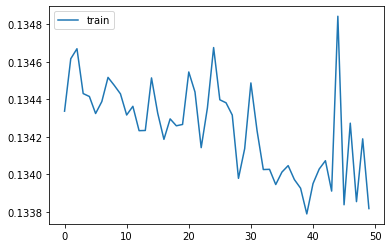

In [117]:
history = model.fit(train_X, y_train, epochs=50, batch_size=72, verbose=1, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [118]:
yhat = model.predict(test_X)
rmse = sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.448


# Another 

In [5]:
df_fpt = df_fpt.sort_values('DateTime')
# df_fpt.reset_index(inplace=True)
print(df_fpt.head())
close_prices = df_fpt.iloc[:, 4:5].values
print(close_prices.shape)

    DateTime Ticker     Open     High      Low    Close  Volume
0 2006-12-13    FPT  22.5807  22.5807  22.5807  22.5807   83530
1 2006-12-14    FPT  23.7097  23.7097  23.7097  23.7097  280710
2 2006-12-15    FPT  24.8952  24.8952  24.8952  24.8952  265300
3 2006-12-18    FPT  26.1371  26.1371  26.1371  26.1372  215790
4 2006-12-19    FPT  27.4356  27.4356  27.4356  27.4356  137520
(3490, 1)


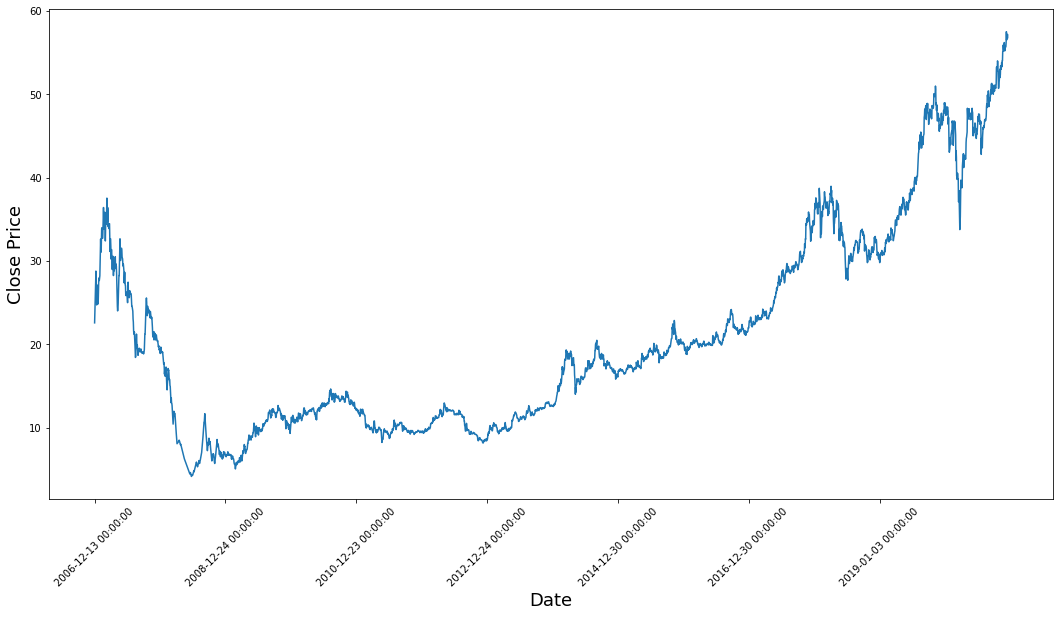

In [6]:
plt.figure(figsize = (18,9))
plt.plot(range(df_fpt.shape[0]),(df_fpt['Close']))
plt.xticks(range(0,df_fpt.shape[0],500),df_fpt['DateTime'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [7]:
X_train = []
y_train = []
for i in range(60, len(close_prices)-1000):
    X_train.append(close_prices[i-60:i, 0])
    y_train.append(close_prices[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train.shape, y_train.shape)
print(X_train, y_train)

(2430, 60) (2430,)
[[22.5807 23.7097 24.8952 ... 32.8845 32.7715 31.1329]
 [23.7097 24.8952 26.1371 ... 32.7715 31.1329 31.1329]
 [24.8952 26.1371 27.4356 ... 31.1329 31.1329 32.6585]
 ...
 [22.8161 22.9171 22.9676 ... 21.3018 21.4532 21.3018]
 [22.9171 22.9676 23.6238 ... 21.4532 21.3018 21.0999]
 [22.9676 23.6238 24.0277 ... 21.3018 21.0999 21.0747]] [31.1329 32.6585 31.6415 ... 21.0999 21.0747 21.0998]


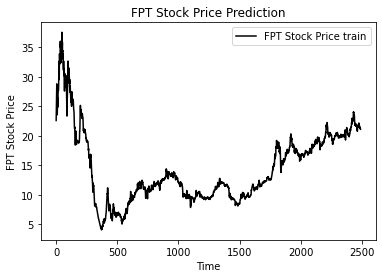

In [8]:
plt.plot(close_prices[:-1000], color = 'black', label = 'FPT Stock Price train')
# plt.plot(predicted_stock_price, color = 'green', label = 'Predicted FPT Stock Price')
plt.title('FPT Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('FPT Stock Price')
plt.legend()
plt.show()


In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
sc.fit(X_train)
x_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train.reshape(-1,1))
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(x_train, y_train, epochs = 25, batch_size = 32)


Epoch 1/25
76/76 [==============================] - 11s 149ms/step - loss: 0.0111
Epoch 2/25
76/76 [==============================] - 13s 175ms/step - loss: 0.0031
Epoch 3/25
76/76 [==============================] - 13s 169ms/step - loss: 0.0025
Epoch 4/25
76/76 [==============================] - 13s 171ms/step - loss: 0.0025
Epoch 5/25
76/76 [==============================] - 13s 166ms/step - loss: 0.00230s - loss:
Epoch 6/25
76/76 [==============================] - 12s 159ms/step - loss: 0.00234s - loss: 
Epoch 7/25
76/76 [==============================] - 12s 164ms/step - loss: 0.0024
Epoch 8/25
76/76 [==============================] - 12s 164ms/step - loss: 0.00211s - 
Epoch 9/25
76/76 [==============================] - 12s 162ms/step - loss: 0.0019
Epoch 10/25
76/76 [==============================] - 13s 165ms/step - loss: 0.0018
Epoch 11/25
76/76 [==============================] - 13s 170ms/step - loss: 0.0018
Epoch 12/25
76/76 [==============================] - 13s 169ms/step - 

In [17]:
test = close_prices[len(close_prices)-1000:].reshape(-1,1)
print(test.shape)
inputs = sc.fit_transform(test)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(1000, 1)
(940, 60, 1)


In [18]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# predicted_stock_price = np.insert(predicted_stock_price, 0,0)

940
1000


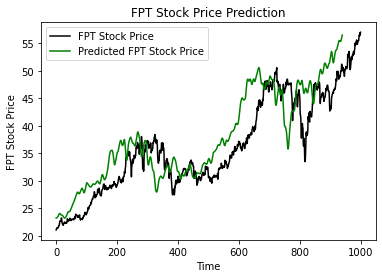

In [19]:
real_stock_price = test
print(len(predicted_stock_price))
print(len(real_stock_price))
plt.plot(real_stock_price, color = 'black', label = 'FPT Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted FPT Stock Price')
plt.title('FPT Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('FPT Stock Price')
plt.legend()
plt.show()
